## Import Libraries and Configure Settings

Below we import all necessary libraries and configure settings required for the assignment.


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math

# Configure Matplotlib to display plots inline in the notebook
%matplotlib inline


## Loading and Inspecting the Consumer Prices Indicators Dataset

In [2]:
# Load the first CSV file
consumer_prices_indicators = pd.read_csv("Consumer prices indicators - FAOSTAT_data_en_2-22-2024.csv")

# printing first five element of the data set
consumer_prices_indicators.head()

,Domain Code,Domain,Area Code (M49),Area,Year Code,Year,Item Code,Item,Months Code,Months,Element Code,Element,Unit,Value,Flag,Flag Description,Note
0,CP,Consumer Price Indices,4,Afghanistan,2000,2000,23013,"Consumer Prices, Food Indices (2015 = 100)",7001,January,6125,Value,NaN,24.356332,I,Imputed value,base year is 2015
1,CP,Consumer Price Indices,4,Afghanistan,2000,2000,23013,"Consumer Prices, Food Indices (2015 = 100)",7002,February,6125,Value,NaN,23.636242,I,Imputed value,base year is 2015
2,CP,Consumer Price Indices,4,Afghanistan,2000,2000,23013,"Consumer Prices, Food Indices (2015 = 100)",7003,March,6125,Value,NaN,23.485345,I,Imputed value,base year is 2015
3,CP,Consumer Price Indices,4,Afghanistan,2000,2000,23013,"Consumer Prices, Food Indices (2015 = 100)",7004,April,6125,Value,NaN,24.767194,I,Imputed value,base year is 2015
4,CP,Consumer Price Indices,4,Afghanistan,2000,2000,23013,"Consumer Prices, Food Indices (2015 = 100)",7005,May,6125,Value,NaN,25.956912,I,Imputed value,base year is 2015


In [3]:
# printing shape of the dataset
consumer_prices_indicators.shape

(112890, 17)

## Group Data and Calculate Mean Yield

In this section, we group the data by 'Area', 'Item', and 'Year', then calculate the mean of the 'Value' column, renaming it to 'yield'.


In [4]:
# Group by 'Area', 'Item', and 'Year', then calculate the mean of the 'Value' column and rename it to 'yield'
consumer_prices_indicators = consumer_prices_indicators.groupby(['Area', 'Item', 'Year'])['Value'].mean().reset_index()

## Data Filtering and Transformation

In this section, we filter the data for years greater than or equal to 2000, use pivot to create new columns based on 'Item', and reset the index to make 'Area' and 'Year' as regular columns.


In [5]:
# Filter data for years greater than or equal to 2000
consumer_prices_indicators = consumer_prices_indicators[consumer_prices_indicators['Year'] >= 2000]

# Use pivot to create new columns based on Item
consumer_prices_indicators = consumer_prices_indicators.pivot(index=['Area', 'Year'], columns='Item', values='Value').rename(columns={"Food price inflation": "food inflation","Consumer Prices, Food Indices (2015 = 100)":  "food indices"})

# Reset index to make 'Area' and 'Year' as regular columns
consumer_prices_indicators.reset_index(inplace=True)

In [6]:
# printing the dataset
consumer_prices_indicators

Item,Area,Year,food indices,food inflation
0,Afghanistan,2000,26.629848,NaN
1,Afghanistan,2001,29.893548,12.780692
2,Afghanistan,2002,35.344892,18.254516
3,Afghanistan,2003,40.203113,14.102244
4,Afghanistan,2004,45.840561,14.072172
...,...,...,...,...
4851,Åland Islands,2019,102.928436,1.797736
4852,Åland Islands,2020,103.585137,0.643114
4853,Åland Islands,2021,104.784347,1.164459
4854,Åland Islands,2022,114.944128,9.678792


## Loading and Inspecting the Crops products Indicators Dataset

In [7]:
crops_products_indicators = pd.read_csv("Crops production indicators - FAOSTAT_data_en_2-22-2024.csv")
crops_products_indicators.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41649 entries, 0 to 41648
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       41649 non-null  object 
 1   Domain            41649 non-null  object 
 2   Area Code (M49)   41649 non-null  int64  
 3   Area              41649 non-null  object 
 4   Element Code      41649 non-null  int64  
 5   Element           41649 non-null  object 
 6   Item Code (CPC)   41649 non-null  object 
 7   Item              41649 non-null  object 
 8   Year Code         41649 non-null  int64  
 9   Year              41649 non-null  int64  
 10  Unit              41649 non-null  object 
 11  Value             41649 non-null  int64  
 12  Flag              41649 non-null  object 
 13  Flag Description  41649 non-null  object 
 14  Note              0 non-null      float64
dtypes: float64(1), int64(5), object(9)
memory usage: 4.8+ MB


In [8]:
# printing shape of the dataset
crops_products_indicators.shape

(41649, 15)

## Crop Products Filtering

In this section, we create a list of crop products and filter the dataset to include only those products.


In [9]:
# crop products list
crop_products = ['Cereals, primary', 'Fibre Crops, Fibre Equivalent', 'Fruit Primary',
                 'Oilcrops, Cake Equivalent', 'Oilcrops, Oil Equivalent', 'Pulses, Total',
                 'Roots and Tubers, Total', 'Sugar Crops Primary', 'Treenuts, Total', 'Vegetables Primary']

# filtering Crop Products from the Dataset
filtered_df = crops_products_indicators[crops_products_indicators['Item'].isin(crop_products)]

## Grouping and Summarizing Crop Products Data

In this section, we group the filtered dataset by 'Area' and 'Year', summing the 'Value' column and renaming it to 'Total crop products value'.


In [10]:
# Group by 'Area' and 'Year', sum the 'Value' column, and rename the column to 'Crop products value'
crops_products_indicators = filtered_df.groupby(['Area', 'Year'])['Value'].sum().reset_index().rename(columns={'Value': 'Total crop products value'})

In [11]:
# prininting crops products indicators
crops_products_indicators

,Area,Year,Total crop products value
0,Afghanistan,2000,590712
1,Afghanistan,2001,596297
2,Afghanistan,2002,601012
3,Afghanistan,2003,599878
4,Afghanistan,2004,597919
...,...,...,...
4582,Zimbabwe,2018,1026361
4583,Zimbabwe,2019,995915
4584,Zimbabwe,2020,986997
4585,Zimbabwe,2021,976379


## Loading and Inspecting the Food Balance Indicator Dataset

In [12]:
# Load the Food Balances Indicators dataset
food_balance_indicator = pd.read_csv("Food balances indicators - FAOSTAT_data_en_2-22-2024.csv")

# Display the first five rows of the dataset
food_balance_indicator.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (FBS),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,FBS,Food Balances (2010-),4,Afghanistan,5611,Import Quantity,S2905,Cereals - Excluding Beer,2010,2010,1000 t,2000.0,E,Estimated value
1,FBS,Food Balances (2010-),4,Afghanistan,5611,Import Quantity,S2905,Cereals - Excluding Beer,2011,2011,1000 t,2448.0,E,Estimated value
2,FBS,Food Balances (2010-),4,Afghanistan,5611,Import Quantity,S2905,Cereals - Excluding Beer,2012,2012,1000 t,2001.0,E,Estimated value
3,FBS,Food Balances (2010-),4,Afghanistan,5611,Import Quantity,S2905,Cereals - Excluding Beer,2013,2013,1000 t,2155.0,E,Estimated value
4,FBS,Food Balances (2010-),4,Afghanistan,5611,Import Quantity,S2905,Cereals - Excluding Beer,2014,2014,1000 t,1840.0,E,Estimated value


In [13]:
# Retrieve and display the unique items in the 'Item' column
food_balance_indicator.Item.unique()

array(['Cereals - Excluding Beer', 'Starchy Roots', 'Sugar Crops',
       'Sugar & Sweeteners', 'Pulses', 'Treenuts', 'Oilcrops',
       'Vegetable Oils', 'Vegetables', 'Fruits - Excluding Wine',
       'Stimulants', 'Spices', 'Alcoholic Beverages', 'Meat', 'Eggs',
       'Milk - Excluding Butter', 'Fish, Seafood'], dtype=object)

## Crop Products Filtering

In this section, we create a list of crop products and filter the dataset to include only those products.


In [14]:
# crop products list
crop_products = ['Cereals - Excluding Beer', 'Starchy Roots', 'Sugar Crops',
       'Sugar & Sweeteners', 'Pulses', 'Treenuts', 'Oilcrops',
       'Vegetable Oils', 'Vegetables', 'Fruits - Excluding Wine', 'Stimulants', 'Spices']

# filtering Crop Products from the Dataset
filtered_df = food_balance_indicator[food_balance_indicator['Item'].isin(crop_products)]

## Data Pivot for Food Balance Indicators

In this section, we pivot the DataFrame to create separate columns for each element of the food balance indicators.


In [15]:
# Pivot the DataFrame to create separate columns for each element
food_balance_indicator = filtered_df.pivot_table(index=['Area', 'Year'], columns='Element', values='Value', aggfunc='sum', fill_value=0).reset_index()

## Dropping and Renaming Columns

In this section, we drop irrelvent columns and rename one column in the food balance indicator DataFrame.


In [16]:
# droping and renaming column columns
food_balance_indicator= food_balance_indicator.drop(columns = ["Losses", "Other uses (non-food)", "Food", "Import Quantity"]).rename(columns={'Export Quantity': 'Export Quantity value'})

In [17]:
food_balance_indicator

Element,Area,Year,Export Quantity value
0,Afghanistan,2010,360.0
1,Afghanistan,2011,277.0
2,Afghanistan,2012,198.0
3,Afghanistan,2013,281.0
4,Afghanistan,2014,412.0
...,...,...,...
2171,Zimbabwe,2017,207.0
2172,Zimbabwe,2018,209.0
2173,Zimbabwe,2019,280.0
2174,Zimbabwe,2020,304.0


## Loading and Inspecting the food trade Indicators Dataset

In [18]:
# Load the Food trade indicators dataset
food_trade_indicators = pd.read_csv("Food trade indicators - FAOSTAT_data_en_2-22-2024.csv")

# print first five rows of the dataset
food_trade_indicators.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,TCL,Crops and livestock products,4,Afghanistan,5622,Import Value,F1888,Cereals and Preparations,1991,1991,1000 USD,41600.0,A,Official figure,NaN
1,TCL,Crops and livestock products,4,Afghanistan,5622,Import Value,F1888,Cereals and Preparations,1992,1992,1000 USD,25600.0,E,Estimated value,NaN
2,TCL,Crops and livestock products,4,Afghanistan,5622,Import Value,F1888,Cereals and Preparations,1993,1993,1000 USD,40000.0,E,Estimated value,NaN
3,TCL,Crops and livestock products,4,Afghanistan,5622,Import Value,F1888,Cereals and Preparations,1994,1994,1000 USD,25700.0,E,Estimated value,NaN
4,TCL,Crops and livestock products,4,Afghanistan,5622,Import Value,F1888,Cereals and Preparations,1995,1995,1000 USD,37720.0,E,Estimated value,NaN


In [19]:
# Retrieve and display the unique items in the 'Item' column
food_trade_indicators.Item.unique()

array(['Cereals and Preparations', 'Fats and Oils (excluding Butter)',
       'Meat and Meat Preparations', 'Sugar and Honey',
       'Fruit and Vegetables', 'Dairy Products and Eggs',
       'Alcoholic Beverages', 'Non-alcoholic Beverages', 'Other food',
       'Non-food', 'Non-edible Fats and Oils', 'Tobacco'], dtype=object)

## Crop Products Filtering

In this section, we create a list of crop products and filter the dataset to include only those products.


In [20]:
# crop products list
crop_products = ['Cereals and Preparations', 'Fats and Oils (excluding Butter)', 'Sugar and Honey',
       'Fruit and Vegetables', 'Other food', 'Non-food', 'Non-edible Fats and Oils', 'Tobacco']

filtered_df = food_trade_indicators[food_trade_indicators['Item'].isin(crop_products)]

## Data Filtering and Pivot for Food Trade Indicators

In this section, we filter the data to include years greater than or equal to 2000 and pivot the DataFrame to create separate columns for each element of the food trade indicators.


In [21]:
# Filter data for years greater than or equal to 2000
filtered_df = filtered_df[filtered_df['Year'] >= 2000]

# Pivot the DataFrame tocreate separate columns for each element
food_trade_indicators = filtered_df.pivot_table(index=['Area', 'Year'], columns='Element', values='Value', aggfunc='sum', fill_value=0).reset_index()

In [22]:
# printing the dataset
food_trade_indicators

Element,Area,Year,Export Value,Import Value
0,Afghanistan,2000,43095.00,269695.00
1,Afghanistan,2001,35440.00,276090.00
2,Afghanistan,2002,35964.00,348601.00
3,Afghanistan,2003,58782.00,481798.00
4,Afghanistan,2004,64919.00,481040.00
...,...,...,...,...
4485,Zimbabwe,2018,2032873.46,708043.81
4486,Zimbabwe,2019,1887161.27,375876.01
4487,Zimbabwe,2020,1821051.91,988426.64
4488,Zimbabwe,2021,1901372.75,1016930.60


## Loading and Inspecting the Land Temperature Change Dataset

In [23]:
# Load the land temperature change dataset
land_temperature_change = pd.read_csv("Land temperature change - FAOSTAT_data_en_2-27-2024.csv")

# printing first five rows of the dataset
land_temperature_change.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Months Code,Months,Year Code,Year,Unit,Value,Flag,Flag Description
0,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,2000,2000,°c,0.618,E,Estimated value
1,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,2001,2001,°c,0.365,E,Estimated value
2,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,2002,2002,°c,1.655,E,Estimated value
3,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,2003,2003,°c,0.997,E,Estimated value
4,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,2004,2004,°c,1.883,E,Estimated value


## Pivoting Land Temperature Change Data

In this section, we filter the land temperature change dataset to include only the 'Temperature change' element and pivot the DataFrame to create separate columns for the temperature change data.


In [24]:
# filter the Land Temperature Change Dataset to include only 'Temperature change' element
land_temperature_change = land_temperature_change[land_temperature_change['Element'] == 'Temperature change']

# Pivot the DataFrame to create separate columns for 'Temperature change'
land_temperature_change = land_temperature_change.pivot_table(index=['Area', 'Year'], columns='Element', values='Value', aggfunc='mean', fill_value=0).reset_index()


In [25]:
# printing the dataset
land_temperature_change

Element,Area,Year,Temperature change
0,Afghanistan,2000,0.9930
1,Afghanistan,2001,1.3110
2,Afghanistan,2002,1.3650
3,Afghanistan,2003,0.5870
4,Afghanistan,2004,1.3732
...,...,...,...
5263,Zimbabwe,2018,0.4532
5264,Zimbabwe,2019,0.9248
5265,Zimbabwe,2020,0.3894
5266,Zimbabwe,2021,-0.1246


## Loading and Inspecting the Pesticides Use dataset

In [26]:
# Load the pesticides use dataset
pesticides_use = pd.read_csv("Pesticides use - FAOSTAT_data_en_2-27-2024.csv")

# printing first five rows of the dataset
pesticides_use.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,RP,Pesticides Use,8,Albania,5157,Agricultural Use,1357,Pesticides (total),2000,2000,t,307.98,E,Estimated value,NaN
1,RP,Pesticides Use,8,Albania,5159,Use per area of cropland,1357,Pesticides (total),2000,2000,kg/ha,0.44,E,Estimated value,NaN
2,RP,Pesticides Use,8,Albania,5173,Use per value of agricultural production,1357,Pesticides (total),2000,2000,g/Int$,0.23,E,Estimated value,NaN
3,RP,Pesticides Use,8,Albania,5157,Agricultural Use,1357,Pesticides (total),2001,2001,t,319.38,E,Estimated value,NaN
4,RP,Pesticides Use,8,Albania,5159,Use per area of cropland,1357,Pesticides (total),2001,2001,kg/ha,0.46,E,Estimated value,NaN


## Pivoting Pesticides Use Data

In this section, we pivot the pesticides use dataset to create separate columns for each item, aggregating values by mean.


In [27]:
# Pivoting the pesticides use Dataset
pesticides_use = pesticides_use.pivot_table(index=['Area', 'Year'], columns='Item', values='Value', aggfunc='mean', fill_value=0).reset_index()

## Loading and Inspecting the Emissions Dataset

In [28]:
# Load the pesticides use dataset
emissions = pd.read_csv("Emissions - FAOSTAT_data_en_2-27-2024.csv")

# printing first five rows of the dataset
emissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28910 entries, 0 to 28909
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       28910 non-null  object 
 1   Domain            28910 non-null  object 
 2   Area Code (M49)   28910 non-null  int64  
 3   Area              28910 non-null  object 
 4   Element Code      28910 non-null  int64  
 5   Element           28910 non-null  object 
 6   Item Code (CPC)   28910 non-null  object 
 7   Item              28910 non-null  object 
 8   Year Code         28910 non-null  int64  
 9   Year              28910 non-null  int64  
 10  Source Code       28910 non-null  int64  
 11  Source            28910 non-null  object 
 12  Unit              28910 non-null  object 
 13  Value             28910 non-null  float64
 14  Flag              28910 non-null  object 
 15  Flag Description  28910 non-null  object 
 16  Note              0 non-null      float6

## Pivoting Emissions Data

In this section, we filter the emissions dataset to include only 'Emissions (N2O)' and 'Emissions (CO2)' elements, then pivot the DataFrame to create separate columns for each element.


In [29]:
# Filter the Land Temperature Change Dataset to include only 'Emissions (N2O)' and 'Emissions (CO2)' elements
emissions = emissions[(emissions['Element'] == 'Emissions (N2O)') | (emissions['Element'] == 'Emissions (CO2)')]

# Pivot the DataFrame to create separate columns for 'Emissions (N2O)' and 'Emissions (CO2)'
emissions = emissions.pivot_table(index=['Area', 'Year'], columns='Element', values='Value').reset_index()

## Loading and Inspecting the Exchange rate Dataset

In [30]:
# Load the pesticides use dataset
exchange_rate = pd.read_csv("Exchange rate - FAOSTAT_data_en_2-22-2024.csv")

# printing first five rows of the dataset
exchange_rate.head()

,Domain Code,Domain,Area Code (M49),Area,ISO Currency Code (FAO),Currency,Element Code,Element,Year Code,Year,Months Code,Months,Unit,Value,Flag,Flag Description
0,PE,Exchange rates,4,Afghanistan,AFA,Afghani,LCU,Local currency units per USD,1980,1980,7001,January,NaN,44.129167,X,Figure from international organizations
1,PE,Exchange rates,4,Afghanistan,AFA,Afghani,LCU,Local currency units per USD,1980,1980,7002,February,NaN,44.129167,X,Figure from international organizations
2,PE,Exchange rates,4,Afghanistan,AFA,Afghani,LCU,Local currency units per USD,1980,1980,7003,March,NaN,44.129167,X,Figure from international organizations
3,PE,Exchange rates,4,Afghanistan,AFA,Afghani,LCU,Local currency units per USD,1980,1980,7004,April,NaN,44.129167,X,Figure from international organizations
4,PE,Exchange rates,4,Afghanistan,AFA,Afghani,LCU,Local currency units per USD,1980,1980,7005,May,NaN,44.129167,X,Figure from international organizations


## Grouping and Filtering Exchange Rate Data

In this section, we group the exchange rate dataset by 'Area' and 'Year', calculate the mean of the 'Value' column, and rename it to 'exchange rate value'. Then, we filter the data for years greater than or equal to 2000.


In [31]:
# Group by 'Area', 'Year', and calculate the mean of the 'Value' column, renaming it to 'exchange rate value'
exchange_rate = exchange_rate.groupby(['Area', 'Year'])['Value'].mean().reset_index().rename(columns={'Value':'exchange rate value'})

# Filter data for years greater than or equal to 2000
exchange_rate = exchange_rate[exchange_rate['Year'] >= 2000]


In [32]:
exchange_rate

,Area,Year,exchange rate value
20,Afghanistan,2000,47357.574730
21,Afghanistan,2001,47500.014520
22,Afghanistan,2002,3981.907750
23,Afghanistan,2003,48.762754
24,Afghanistan,2004,47.845312
...,...,...,...
8634,Åland Islands,2019,0.893288
8635,Åland Islands,2020,0.877475
8636,Åland Islands,2021,0.845377
8637,Åland Islands,2022,0.950916


## Loading and Inspecting the Land use Dataset

In [33]:
# Load the pesticides use dataset
land_use = pd.read_csv("Land use - FAOSTAT_data_en_2-22-2024.csv")

# printing first five rows of the dataset
land_use.head()

C:\Users\udayk\AppData\Local\Temp\ipykernel_13964\2150134480.py:2: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  land_use = pd.read_csv("Land use - FAOSTAT_data_en_2-22-2024.csv")


,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,RL,Land Use,4,Afghanistan,5110,Area,6600,Country area,1980,1980,1000 ha,65286.0,A,Official figure,NaN
1,RL,Land Use,4,Afghanistan,5110,Area,6600,Country area,1981,1981,1000 ha,65286.0,A,Official figure,NaN
2,RL,Land Use,4,Afghanistan,5110,Area,6600,Country area,1982,1982,1000 ha,65286.0,A,Official figure,NaN
3,RL,Land Use,4,Afghanistan,5110,Area,6600,Country area,1983,1983,1000 ha,65286.0,A,Official figure,NaN
4,RL,Land Use,4,Afghanistan,5110,Area,6600,Country area,1984,1984,1000 ha,65286.0,A,Official figure,NaN


## Filtering and Renaming Land Use Data

In this section, we filter the land use dataset to include only 'Land area' items and years greater than or equal to 2000. Then, we select specific columns and rename them appropriately. Finally, we reset the index.


In [34]:
# Filter the DataFrame
land_use_filtered = land_use[(land_use['Item'] == 'Land area') & (land_use['Year'] >= 2000)]

# Select specific columns and rename them
land_use_filtered = land_use_filtered[['Area', 'Year', 'Value']].rename(columns={'Value': 'land area value'})

# Reset the index
land_use_filtered.reset_index(drop=True, inplace=True)


In [35]:
land_use_filtered

,Area,Year,land area value
0,Afghanistan,2000,65223.0
1,Afghanistan,2001,65223.0
2,Afghanistan,2002,65223.0
3,Afghanistan,2003,65223.0
4,Afghanistan,2004,65223.0
...,...,...,...
5169,Zimbabwe,2017,38685.0
5170,Zimbabwe,2018,38685.0
5171,Zimbabwe,2019,38685.0
5172,Zimbabwe,2020,38685.0


## Loading and Inspecting thefood security inductors dataset

In [36]:
# Load the pesticides use dataset
food_security_indicators = pd.read_csv("Food security indicators  - FAOSTAT_data_en_2-22-2024.csv")

# printing first five rows of the dataset
food_security_indicators.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,21010,Average dietary energy supply adequacy (percen...,20002002,2000-2002,%,88.0,E,Estimated value,NaN
1,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,21010,Average dietary energy supply adequacy (percen...,20012003,2001-2003,%,89.0,E,Estimated value,NaN
2,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,21010,Average dietary energy supply adequacy (percen...,20022004,2002-2004,%,92.0,E,Estimated value,NaN
3,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,21010,Average dietary energy supply adequacy (percen...,20032005,2003-2005,%,93.0,E,Estimated value,NaN
4,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,21010,Average dietary energy supply adequacy (percen...,20042006,2004-2006,%,94.0,E,Estimated value,NaN


## Filtering and Preprocessing Food Security Indicators Data

In this section, we filter the food security indicators dataset to include only rows with Item Code 21033, 21010, 21031, 21030 and 21032. We then extract the year from the 'Year' column and convert it to an integer. Next, we filter the dataset to include only rows with specific indicator item codes.


In [37]:
# Extract the year from the 'Year' column and convert it to integer
food_security_indicators["Year"] = food_security_indicators["Year"].apply(lambda x: x.split('-')[-1])
food_security_indicators["Year"] = food_security_indicators["Year"].astype(int)

# List of indicator item codes
indicators = [21033, 21010, 21031, 21030, 21032]

# Filter the DataFrame to include only rows with specified indicator item codes
filtered_df = food_security_indicators[food_security_indicators['Item Code'].isin(indicators)]
filtered_df


,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,21010,Average dietary energy supply adequacy (percen...,20002002,2002,%,88.0,E,Estimated value,NaN
1,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,21010,Average dietary energy supply adequacy (percen...,20012003,2003,%,89.0,E,Estimated value,NaN
2,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,21010,Average dietary energy supply adequacy (percen...,20022004,2004,%,92.0,E,Estimated value,NaN
3,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,21010,Average dietary energy supply adequacy (percen...,20032005,2005,%,93.0,E,Estimated value,NaN
4,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,21010,Average dietary energy supply adequacy (percen...,20042006,2006,%,94.0,E,Estimated value,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36466,FS,Suite of Food Security Indicators,716,Zimbabwe,6128,Value,21031,Per capita food supply variability (kcal/cap/day),2017,2017,kcal/pc/d,60.0,E,Estimated value,NaN
36467,FS,Suite of Food Security Indicators,716,Zimbabwe,6128,Value,21031,Per capita food supply variability (kcal/cap/day),2018,2018,kcal/pc/d,53.0,E,Estimated value,NaN
36468,FS,Suite of Food Security Indicators,716,Zimbabwe,6128,Value,21031,Per capita food supply variability (kcal/cap/day),2019,2019,kcal/pc/d,22.0,E,Estimated value,NaN
36469,FS,Suite of Food Security Indicators,716,Zimbabwe,6128,Value,21031,Per capita food supply variability (kcal/cap/day),2020,2020,kcal/pc/d,20.0,E,Estimated value,NaN


## Pivoting Food Security Indicators Data

In this section, we pivot the food security indicators dataset to create separate columns for each element. We also rename the columns for better readability.


In [38]:
# Pivot the DataFrame to create separate columns for each element
food_security_indicators = filtered_df.pivot_table(index=['Area', 'Year'], columns='Item', values='Value').reset_index().rename(columns={
    'Average dietary energy supply adequacy (percent) (3-year average)': 'dietary energy',
    'Per capita food production variability (constant 2014-2016 thousand int$ per capita)': 'food production variability',
    'Per capita food supply variability (kcal/cap/day)': 'food supply variability',
    'Political stability and absence of violence/terrorism (index)': 'Political stability',
    'Value of food imports in total merchandise exports (percent) (3-year average)': 'merchandise exports'
})


In [39]:
food_security_indicators

Item,Area,Year,dietary energy,food production variability,food supply variability,Political stability,merchandise exports
0,Afghanistan,2000,NaN,NaN,58.0,-2.44,NaN
1,Afghanistan,2001,NaN,16.3,47.0,NaN,NaN
2,Afghanistan,2002,88.0,21.0,71.0,-2.04,240.0
3,Afghanistan,2003,89.0,20.8,72.0,-2.20,281.0
4,Afghanistan,2004,92.0,17.3,50.0,-2.30,199.0
...,...,...,...,...,...,...,...
4614,Zimbabwe,2018,94.0,19.7,53.0,-0.72,20.0
4615,Zimbabwe,2019,92.0,5.6,22.0,-0.96,13.0
4616,Zimbabwe,2020,91.0,5.6,20.0,-1.07,14.0
4617,Zimbabwe,2021,91.0,NaN,21.0,-1.03,15.0


## Merging DataFrames

In this section, we merge multiple DataFrames on 'Area' and 'Year' using an outer join to create a comprehensive dataset for analysis.


In [40]:
# Merging DataFrames on 'Area' and 'Year' using an outer join
df = pd.merge(consumer_prices_indicators, crops_products_indicators, on =['Area', 'Year'], how = 'outer')
df = pd.merge(df, food_balance_indicator, on =['Area', 'Year'], how = 'outer')
df = pd.merge(df, food_trade_indicators, on =['Area', 'Year'], how = 'outer')
df = pd.merge(df, land_temperature_change, on =['Area', 'Year'], how = 'outer')
df = pd.merge(df, pesticides_use, on =['Area', 'Year'], how = 'outer')
df = pd.merge(df, food_security_indicators, on =['Area', 'Year'], how = 'outer')
df = pd.merge(df, land_use_filtered, on =['Area', 'Year'], how = 'outer')
df = pd.merge(df, exchange_rate, on =['Area', 'Year'], how = 'outer')
df = pd.merge(df, emissions, on =['Area', 'Year'], how = 'outer')

In [41]:
df

,Area,Year,food indices,food inflation,Total crop products value,Export Quantity value,Export Value,Import Value,Temperature change,Fungicides and Bactericides,...,Rodenticides,dietary energy,food production variability,food supply variability,Political stability,merchandise exports,land area value,exchange rate value,Emissions (CO2),Emissions (N2O)
0,Afghanistan,2000,26.629848,NaN,590712.0,NaN,43095.0,269695.0,0.9930,NaN,...,NaN,NaN,NaN,58.0,-2.44,NaN,65223.0,47357.574730,0.0,0.0
1,Afghanistan,2001,29.893548,12.780692,596297.0,NaN,35440.0,276090.0,1.3110,NaN,...,NaN,NaN,16.3,47.0,NaN,NaN,65223.0,47500.014520,0.0,0.0
2,Afghanistan,2002,35.344892,18.254516,601012.0,NaN,35964.0,348601.0,1.3650,NaN,...,NaN,88.0,21.0,71.0,-2.04,240.0,65223.0,3981.907750,0.0,0.0
3,Afghanistan,2003,40.203113,14.102244,599878.0,NaN,58782.0,481798.0,0.5870,NaN,...,NaN,89.0,20.8,72.0,-2.20,281.0,65223.0,48.762754,0.0,0.0
4,Afghanistan,2004,45.840561,14.072172,597919.0,NaN,64919.0,481040.0,1.3732,NaN,...,NaN,92.0,17.3,50.0,-2.30,199.0,65223.0,47.845312,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5921,Åland Islands,2019,102.928436,1.797736,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.893288,NaN,NaN
5922,Åland Islands,2020,103.585137,0.643114,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.877475,NaN,NaN
5923,Åland Islands,2021,104.784347,1.164459,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.845377,NaN,NaN
5924,Åland Islands,2022,114.944128,9.678792,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.950916,NaN,NaN


In [42]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [43]:
len(df.columns)

25

In [44]:
df.columns

Index(['Area', 'Year', 'food indices', 'food inflation',
       'Total crop products value', 'Export Quantity value', 'Export Value',
       'Import Value', 'Temperature change', 'Fungicides and Bactericides',
       'Fungicides – Seed treatments', 'Herbicides', 'Insecticides',
       'Insecticides – Seed Treatments', 'Pesticides (total)', 'Rodenticides',
       'dietary energy', 'food production variability',
       'food supply variability', 'Political stability', 'merchandise exports',
       'land area value', 'exchange rate value', 'Emissions (CO2)',
       'Emissions (N2O)'],
      dtype='object')

In [45]:
df

,Area,Year,food indices,food inflation,Total crop products value,Export Quantity value,Export Value,Import Value,Temperature change,Fungicides and Bactericides,...,Rodenticides,dietary energy,food production variability,food supply variability,Political stability,merchandise exports,land area value,exchange rate value,Emissions (CO2),Emissions (N2O)
0,Albania,2010,84.268140,5.186276,957315.0,41.0,54423.00,716893.00,1.1910,188.53,...,9.30,128.0,7.5,44.0,-0.19,52.0,2740.0,103.936667,54.88700,0.03750
1,Albania,2011,87.961900,4.392094,986413.0,56.0,79076.00,756193.00,1.0552,208.60,...,24.48,130.0,7.7,63.0,-0.28,45.0,2740.0,100.895833,54.90560,0.03750
2,Albania,2012,90.036610,2.404087,993306.0,72.0,80834.00,725009.00,1.4872,177.46,...,0.59,132.0,10.8,63.0,-0.14,39.0,2740.0,108.184167,54.90560,0.03750
3,Albania,2013,93.837014,4.214607,1007396.0,88.0,104789.00,745689.00,1.3332,182.48,...,18.48,133.0,17.3,38.0,0.09,35.0,2740.0,105.669167,54.57885,0.03725
4,Albania,2014,95.911724,2.212385,1047116.0,92.0,66876.64,476709.33,1.1976,277.58,...,47.78,134.0,15.1,23.0,0.49,29.0,2740.0,105.480000,54.57885,0.03725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,Zimbabwe,2016,96.760817,-3.236496,1015537.0,236.0,2025705.69,994894.51,1.2698,359.59,...,0.00,96.0,25.9,58.0,-0.62,26.0,38685.0,364.153890,0.00000,0.00000
1682,Zimbabwe,2017,99.207676,2.534985,984915.0,207.0,1858244.66,712994.23,0.0878,359.59,...,0.00,95.0,26.4,60.0,-0.71,25.0,38685.0,361.893274,0.00000,0.00000
1683,Zimbabwe,2018,113.947438,14.589943,1026361.0,209.0,2032873.46,708043.81,0.4532,359.59,...,0.00,94.0,19.7,53.0,-0.72,20.0,38685.0,322.206265,0.00000,0.00000
1684,Zimbabwe,2019,519.876943,324.182596,995915.0,280.0,1887161.27,375876.01,0.9248,359.59,...,0.00,92.0,5.6,22.0,-0.96,13.0,38685.0,16.923764,0.00000,0.00000


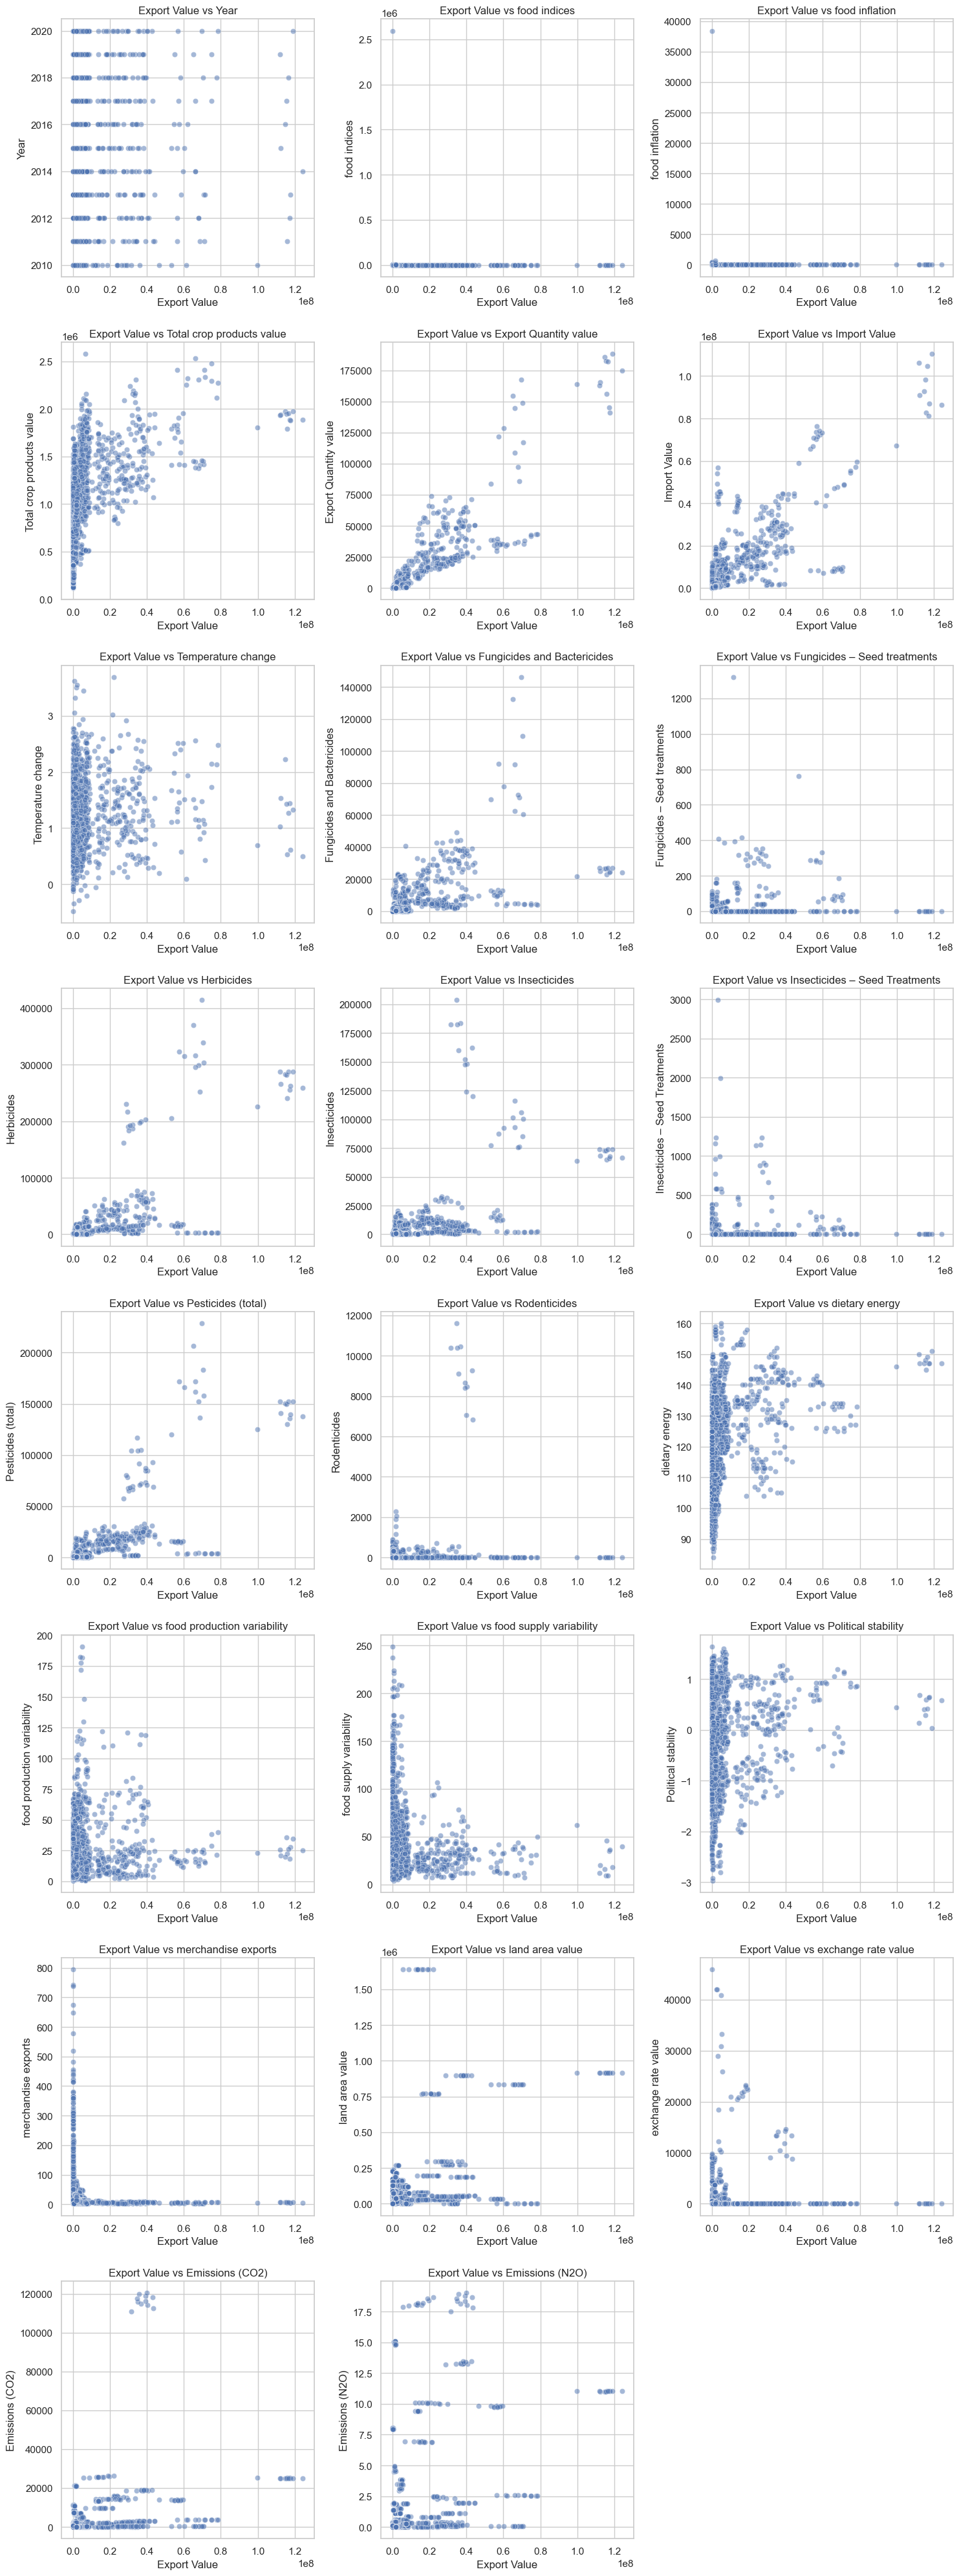

In [46]:
# Assuming df is your DataFrame

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
numeric_columns.remove('Export Value')

# Set the style for Seaborn plots
sns.set(style="whitegrid")

# Calculate the number of rows and columns for subplots
num_plots = len(numeric_columns)
num_cols = min(3, num_plots)
num_rows = math.ceil(num_plots / num_cols)

# Create scatter plots
plt.figure(figsize=(15, 5*num_rows))  # Adjust the size here
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.scatterplot(data=df, x='Export Value', y=column, alpha=0.5)
    plt.title(f'Export Value vs {column}')
    plt.xlabel('Export Value')
    plt.ylabel(column)
plt.tight_layout()
plt.show()


## Visualizing Numeric Data Distribution

In this section, we visualize the distribution of numeric data using histograms with seaborn. Each subplot represents a different numeric column from the DataFrame, excluding 'Export Value'.


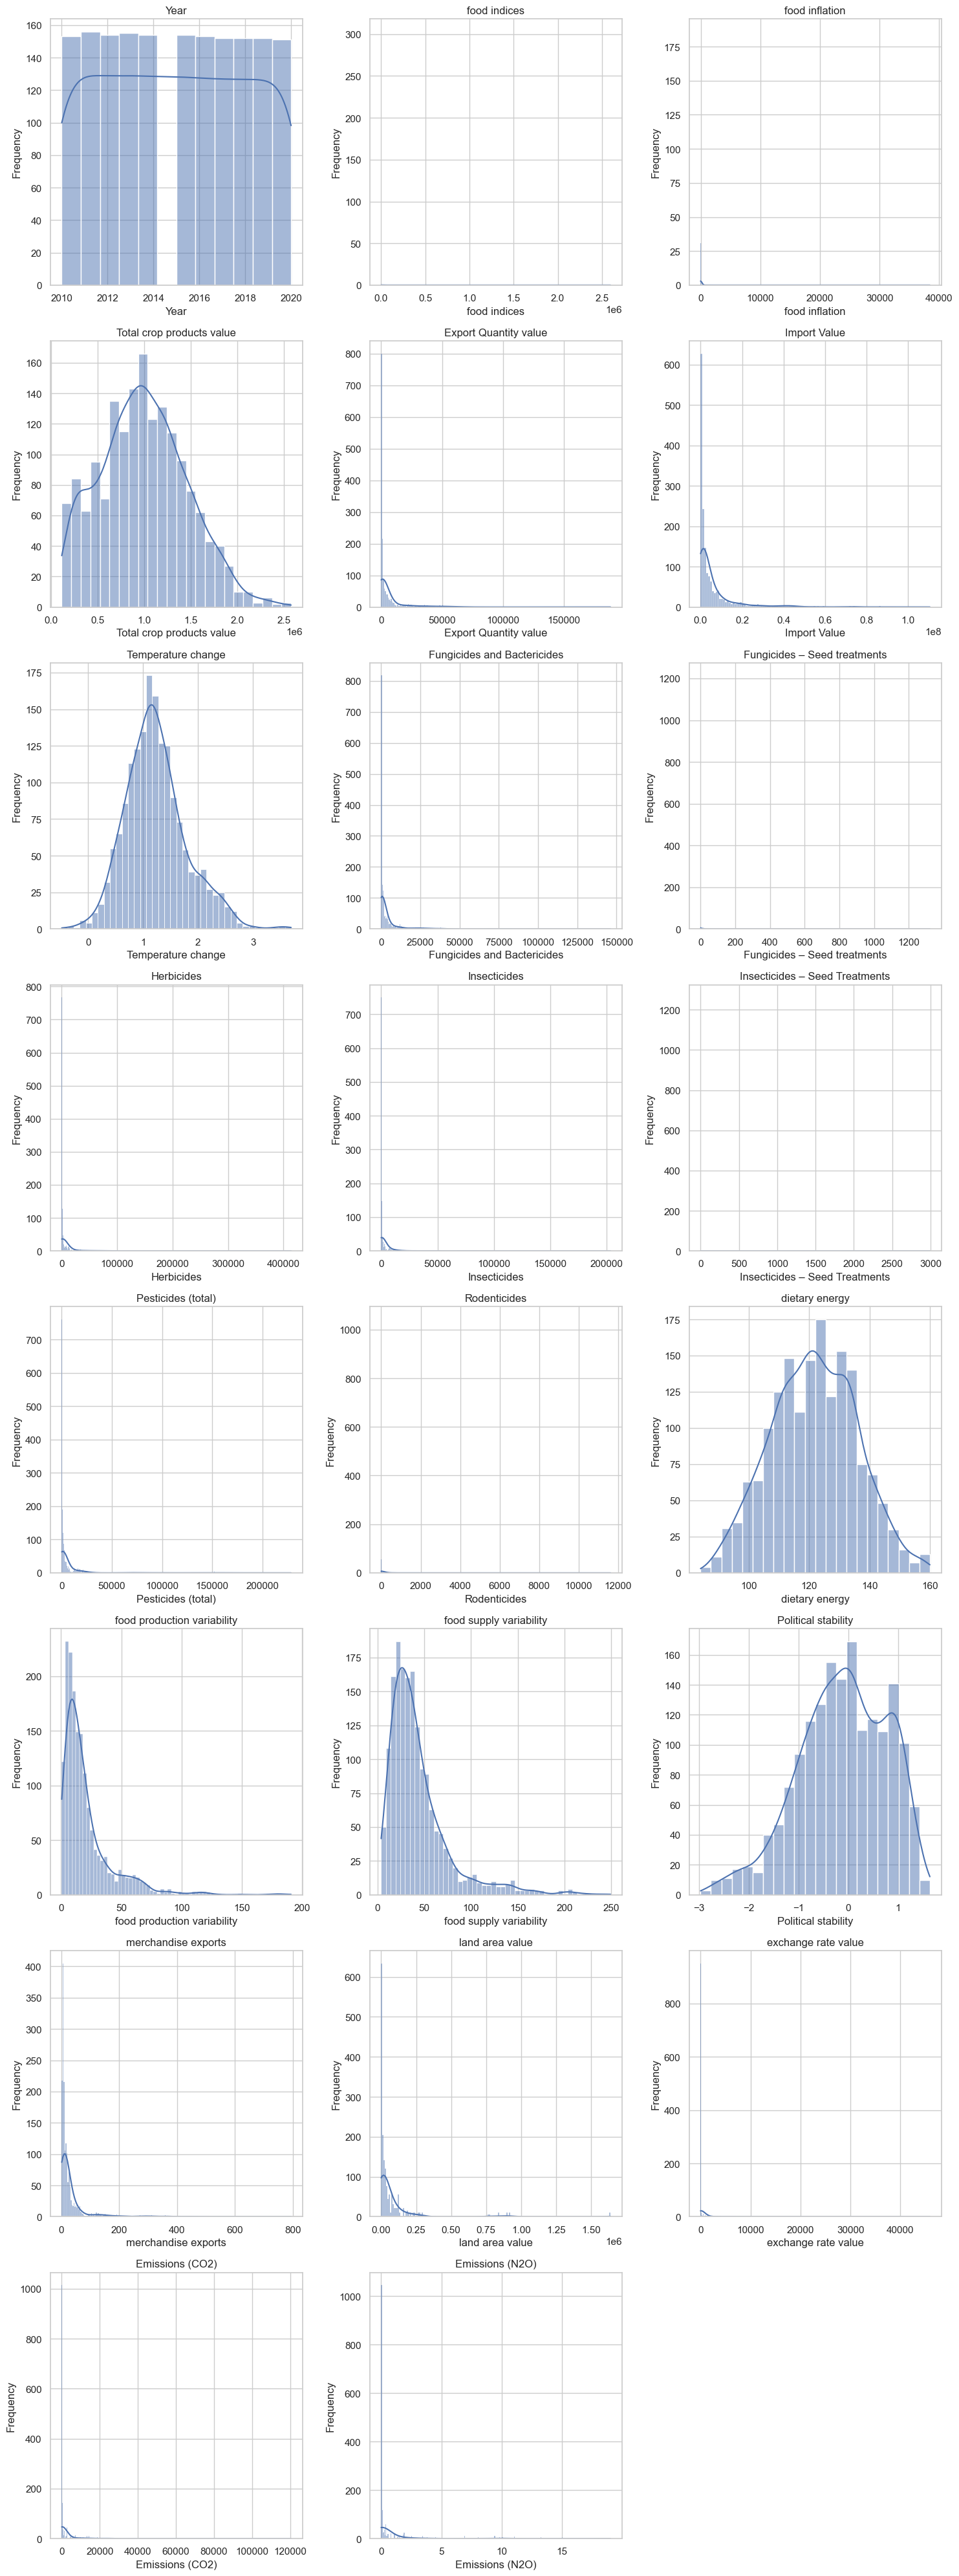

In [47]:
# Get the numeric columns from the DataFrame
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
numeric_columns.remove('Export Value')  # Remove 'Export Value' column from numeric columns

# Set the style for Seaborn plots
sns.set(style="whitegrid")

# Calculate the number of rows and columns for subplots
num_plots = len(numeric_columns)
num_cols = min(3, num_plots)
num_rows = math.ceil(num_plots / num_cols)

# Create scatter plots
plt.figure(figsize=(15, 5*num_rows))  # Adjust the size here
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'{column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


## Analyzing Correlation Between Numeric Columns

In this section, we calculate the correlation matrix for numeric columns in the DataFrame and visualize it using a heatmap. We then extract highly correlating column pairs based on a specified threshold and print them.


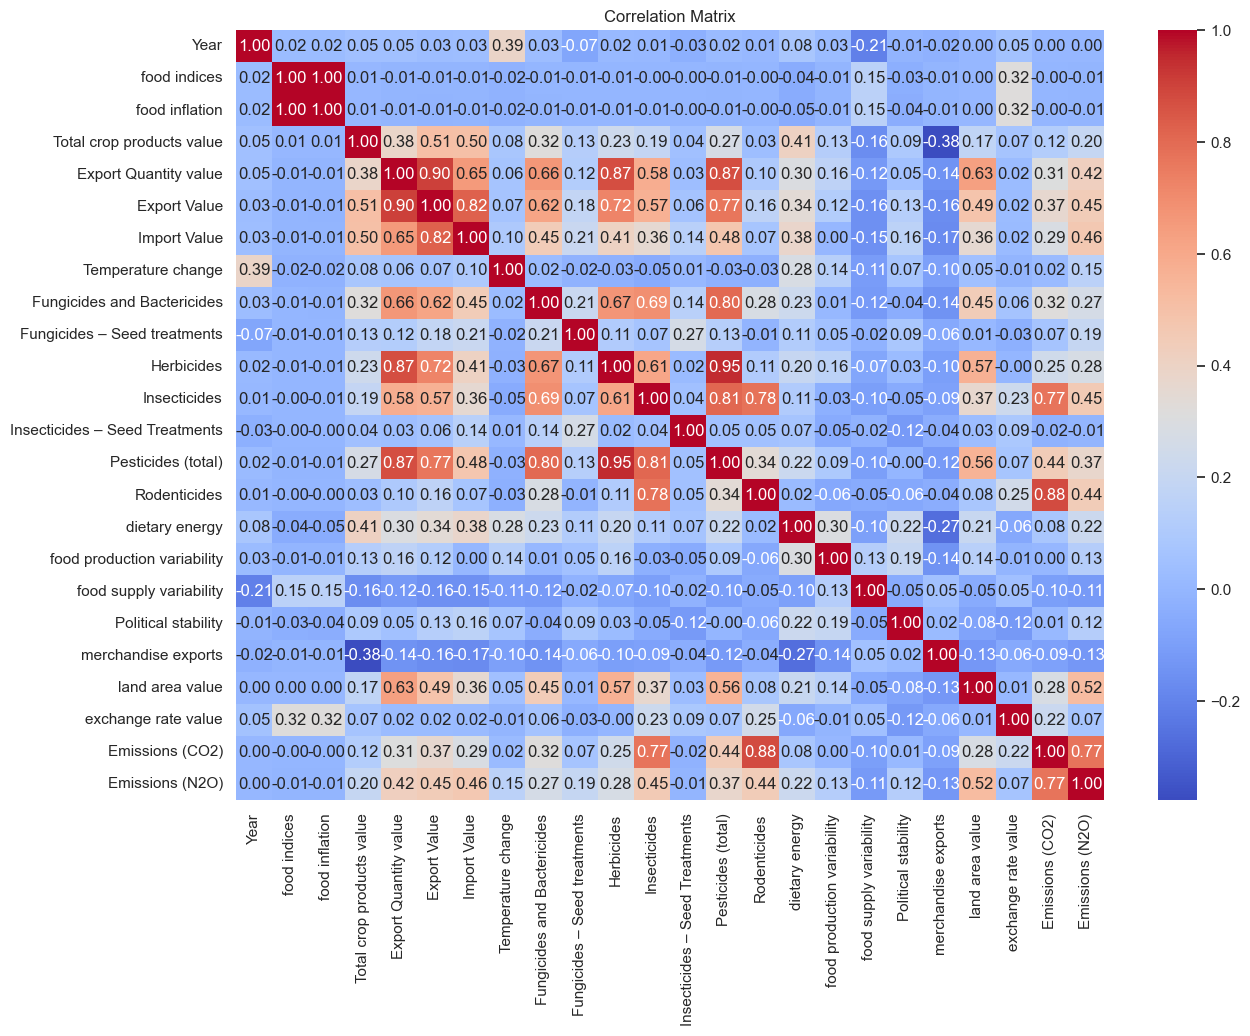

Highly Correlating Column Pairs:
food indices - food inflation: 1.00
Export Quantity value - Export Value: 0.90
Export Quantity value - Import Value: 0.65
Export Quantity value - Fungicides and Bactericides: 0.66
Export Quantity value - Herbicides: 0.87
Export Quantity value - Insecticides: 0.58
Export Quantity value - Pesticides (total): 0.87
Export Quantity value - land area value: 0.63
Export Value - Total crop products value: 0.51
Export Value - Import Value: 0.82
Export Value - Fungicides and Bactericides: 0.62
Export Value - Herbicides: 0.72
Export Value - Insecticides: 0.57
Export Value - Pesticides (total): 0.77
Import Value - Total crop products value: 0.50
Fungicides and Bactericides - Herbicides: 0.67
Fungicides and Bactericides - Insecticides: 0.69
Fungicides and Bactericides - Pesticides (total): 0.80
Herbicides - Insecticides: 0.61
Herbicides - Pesticides (total): 0.95
Herbicides - land area value: 0.57
Insecticides - Pesticides (total): 0.81
Insecticides - Rodenticides: 

In [48]:
# Exclude non-numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(14, 10))  # Adjust the width here
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Set a threshold for correlation coefficient
threshold = 0.5  # Adjust as needed

# Get the absolute values of correlation coefficients
abs_corr_matrix = corr_matrix.abs()

# Extract highly correlating columns
high_corr_columns = abs_corr_matrix[abs_corr_matrix > threshold]
high_corr_columns = high_corr_columns.unstack().dropna()

# Print highly correlating column pairs
print("Highly Correlating Column Pairs:")
for (col1, col2), corr in high_corr_columns.items():
    if col1 != col2 and col1 < col2:  # Avoid duplicate pairs and self-correlation
        print(f"{col1} - {col2}: {corr:.2f}")


## Visualizing Relationship between Export Value and Total Crop Products Value

In this section, we visualize the relationship between 'Export Value' and 'Total crop products value' using a jointplot with a regression line.


C:\Users\udayk\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:2219: UserWarning: The marginal plotting function has changed to `histplot`, which does not accept the following argument(s): rug.
  warnings.warn(msg, UserWarning)


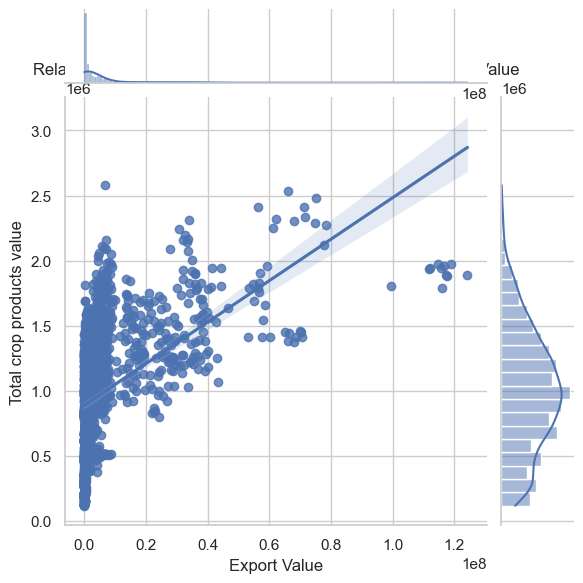

In [49]:
# Visualizing the relationship between 'Export Value' and 'Total crop products value' with a regression line
sns.jointplot(data=df, x='Export Value', y='Total crop products value', kind='reg', marginal_kws=dict(rug=True))
plt.title('Relationship between Export Value and Total Crop Products Value')
plt.show()


## Building and Training a Neural Network Model

In this section, we prepare the data, build a multi-layer perceptron (MLP) model, train the model, evaluate its performance, make predictions, and visualize the training history.


Epoch 1/80
539/539 ━━━━━━━━━━━━━━━━━━━━ 2s 918us/step - loss: 245703787937792.0000 - mae: 6403744.5000 - val_loss: 287725462749184.0000 - val_mae: 6858716.0000
Epoch 2/80
539/539 ━━━━━━━━━━━━━━━━━━━━ 0s 661us/step - loss: 315990743187456.0000 - mae: 7391121.0000 - val_loss: 287586547400704.0000 - val_mae: 6855821.5000
Epoch 3/80
539/539 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step - loss: 233742002028544.0000 - mae: 6902708.0000 - val_loss: 287151447080960.0000 - val_mae: 6847058.5000
Epoch 4/80
539/539 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step - loss: 299075954016256.0000 - mae: 6846402.0000 - val_loss: 286562264809472.0000 - val_mae: 6835045.5000
Epoch 5/80
539/539 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step - loss: 221429387755520.0000 - mae: 6001275.0000 - val_loss: 285637538217984.0000 - val_mae: 6816475.0000
Epoch 6/80
539/539 ━━━━━━━━━━━━━━━━━━━━ 0s 646us/step - loss: 295625685991424.0000 - mae: 6766129.0000 - val_loss: 284391091732480.0000 - val_mae: 6792072.5000
Epoch 7/80
539/539 ━━━━━━━━━━━━━━━━━━━━ 

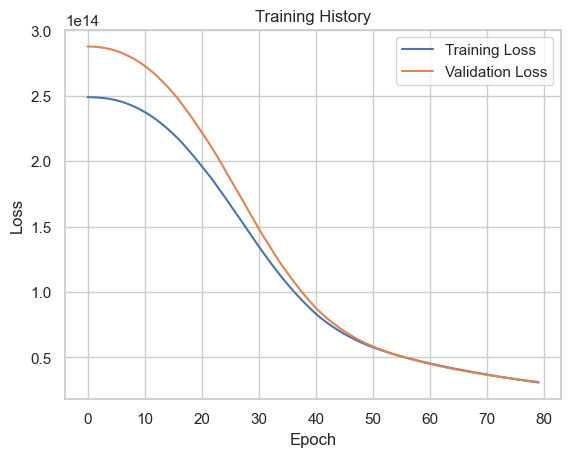

In [50]:
# Selecting features (X) and target variable (y)
X = df[['Year','Total crop products value', 'Export Quantity value', 'Import Value',
        'Rodenticides', 'dietary energy', 'food production variability',
        'food supply variability', 'land area value', 'exchange rate value']]
y = df['Export Value']

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the MLP model architecture
class MLP(tf.keras.Model):
    def __init__(self):
        super(MLP, self).__init__()
        self.dense1 = tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))
        self.dropout1 = tf.keras.layers.Dropout(0.2)
        self.dense2 = tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))
        self.dropout2 = tf.keras.layers.Dropout(0.2)
        self.dense3 = tf.keras.layers.Dense(1)

    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dropout1(x)
        x = self.dense2(x)
        x = self.dropout2(x)
        return self.dense3(x)

# Initialize the model
model = MLP()

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='mean_squared_error',
              metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=80, batch_size=2, validation_split=0.2)

# Step 4: Model Evaluation

# Evaluate the model on test data
mse, mae = model.evaluate(X_test, y_test)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

# Make predictions on test data
predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
print("R-squared (R2):", r2)

# Plot the training history (loss)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training History')
plt.show()


## Visualizing True Values vs. Predictions

In this section, we plot a scatter plot to visualize the relationship between the true values (y_test) and the predicted values (predictions) obtained from the trained neural network model.


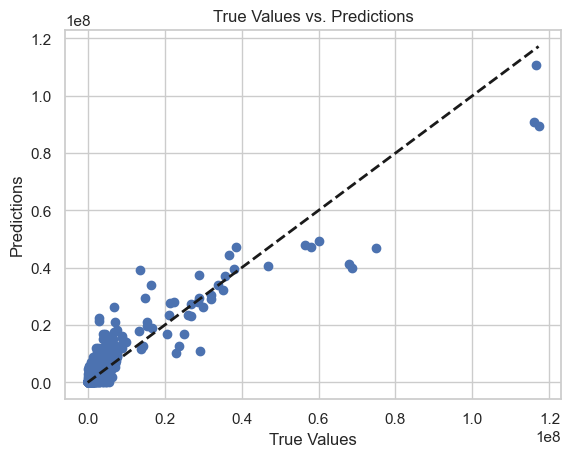

In [51]:
# Plot scatter plot of y_test and predictions
plt.scatter(y_test, predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Boundary line
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs. Predictions')
plt.show()


## Saving Predictions to CSV

In this section, we create a DataFrame containing true values and predictions and save it to a CSV file named "predictions_output.csv".


In [52]:
# Create the output DataFrame
output = pd.DataFrame({'true_values': y_test, 'predictions': predictions})

# Save the DataFrame to a CSV file
output.to_csv('predictions_output.csv', index=False)


ValueError: Per-column arrays must each be 1-dimensional

In [ ]:
def prepare_future_data(area_name, years_ahead, base_year, df, numeric_scaler, categories):
    # Assuming the latest available data is used for predictions
    latest_data = df[df['Area'] == area_name].iloc[-1]

    # Create a DataFrame for future data
    future_data = pd.DataFrame({
        'Area': [area_name] * years_ahead,
        'Year': [base_year + i for i in range(1, years_ahead + 1)],
        'Total crop products value': [latest_data['Total crop products value']] * years_ahead,
        'Export Quantity value': [latest_data['Export Quantity value']] * years_ahead,
        'Import Value': [latest_data['Import Value']] * years_ahead,
        'Rodenticides': [latest_data['Rodenticides']] * years_ahead,
        'dietary energy': [latest_data['dietary energy']] * years_ahead,
        'food production variability': [latest_data['food production variability']] * years_ahead,
        'food supply variability': [latest_data['food supply variability']] * years_ahead,
        'land area value': [latest_data['land area value']] * years_ahead,
        'exchange rate value': [latest_data['exchange rate value']] * years_ahead,
    })
    # Ensure you're processing the correct numerical columns
    if set(numerical_cols) - set(future_data.columns):
        raise ValueError("Missing columns in future data setup. Ensure all required columns are included.")
    
    # Process the data for prediction
    future_data_numerical = future_data[list(numerical_cols)]  # list() ensures the order
    future_data_categorical = pd.get_dummies(future_data[['Area']], drop_first=True)
    future_data_categorical = future_data_categorical.reindex(columns=categories, fill_value=0)
    future_data_numerical = numeric_scaler.transform(future_data_numerical)

    future_data_preprocessed = pd.concat([
        future_data_categorical.reset_index(drop=True),
        pd.DataFrame(future_data_numerical, columns=numerical_cols)
    ], axis=1)

    return future_data_preprocessed

def predict_export_value(area_name, years_ahead, base_year, df, model, scaler, categories):
    future_data_preprocessed = prepare_future_data(area_name, years_ahead, base_year, df, scaler, categories)
    predictions = model.predict(future_data_preprocessed)
    return predictions


Area = input("Enter the Area name")
# When calling the function, ensure categories is defined and passed:
predicted_exports = predict_export_value(Area, 3, 2020, df, mlp, numeric_scaler, categories)
print(f"Predicted Export Values for {Area} for the next 2021 years: {predicted_exports[0]}")
print(f"Predicted Export Values for {Area} for the next 2022 years: {predicted_exports[1]}")
print(f"Predicted Export Values for {Area} for the next 2023 years: {predicted_exports[2]}")

In [ ]:
df.to_csv('data.csv', index=False)

In [ ]:
# Define the input area and years for prediction
input_area = 'India'  # Change to the actual area you're interested in
years = [2021, 2022, 2023]

# Create future data with sample values; replace np.random.rand(3) with appropriate estimates or placeholder values
future_data = pd.DataFrame({
    'Area': [input_area] * len(years),
    'Year': years,
    'Total crop products value': np.random.rand(len(years)),
    'Export Quantity value': np.random.rand(len(years)),
    'Import Value': np.random.rand(len(years)),
    'Rodenticides': np.random.rand(len(years)),
    'dietary energy': np.random.rand(len(years)),
    'food production variability': np.random.rand(len(years)),
    'food supply variability': np.random.rand(len(years)),
    'land area value': np.random.rand(len(years)),
    'exchange rate value': np.random.rand(len(years))
})

# Processing numerical a categorical data
numerical_cols = ['Year','Total crop products value', 'Export Quantity value', 'Import Value',
         'Rodenticides', 'dietary energy', 'food production variability',
         'food supply variability', 'land area value',
         'exchange rate value']
categorical_cols = ['Area']

future_data_numerical = future_data[numerical_cols]
future_data_numerical = numeric_scaler.transform(future_data_numerical)  # Scale the numerical data

future_data_categorical = pd.get_dummies(future_data[categorical_cols], drop_first=True)
future_data_categorical = future_data_categorical.reindex(columns=X_train.columns, fill_value=0)  # Adjust columns to match training data

# Combine numerical and categorical data
future_data_preprocessed = pd.concat([future_data_categorical, pd.DataFrame(future_data_numerical, columns=numerical_cols)], axis=1)

# Predict using the MLP model
predictions = mlp.predict(future_data_preprocessed)
print(f"Predicted Export Values for {input_area} in {years}: {predictions}")
